## Dataset preprocessing

In [1]:
import os 

dialects = [d for d in os.listdir(".") if not os.path.isfile(d) and d != '.ipynb_checkpoints']
len(dialects)

11

In [2]:
fold_label = {
    'eml_texts' : 0,
    'nap_texts' : 1,
    'pms_texts' : 2,
    'fur_texts' : 3,
    'lld_texts' : 4,
    'lij_texts' : 5,
    'lmo_texts' : 6,
    'roa_tara_texts' : 7,
    'scn_texts' : 8,
    'vec_texts' : 9,
    'sc_texts' : 10
}

In [3]:
dial_label = {
    0 : 'eml',
    1 : 'nap',
    2 : 'pms',
    3 : 'fur',
    4 : 'lld',
    5 : 'lij',
    6 : 'lmo',
    7 : 'roa_tara',
    8 : 'scn', 
    9 : 'vec',
    10 : 'sc'
}

In [4]:
import json
import pandas as pd

data = []

for d in dialects:
    for name in os.listdir(d + "/AA/"):
        f = open(d + "/AA/" + name, "r")
        lines = f.readlines()
        for l in lines:
            jline = json.loads(l)
            if not jline['text']:
                continue
            data.append([int(jline['id']), jline['url'], jline['title'], jline['text'], fold_label[d]])

In [5]:
columns = {'id':int(), 'url':str, 'title':str, 'text':str, 'label':int()}
df = pd.DataFrame(data, columns = columns)
df

,id,url,title,text,label
0,32636,https://eml.wikipedia.org/wiki?curid=32636,.iveco,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
1,32637,https://eml.wikipedia.org/wiki?curid=32637,.case,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
2,32638,https://eml.wikipedia.org/wiki?curid=32638,.caseih,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
3,32639,https://eml.wikipedia.org/wiki?curid=32639,.baseball,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
4,32640,https://eml.wikipedia.org/wiki?curid=32640,.newholland,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
...,...,...,...,...,...
265011,19719,https://sc.wikipedia.org/wiki?curid=19719,Ninetta Bartoli,"Ninetta Bartoli (Boruta, 24 de cabudanni de su...",10
265012,19721,https://sc.wikipedia.org/wiki?curid=19721,Istòria de Sardigna sabàuda,S'istòria de sa Sardigna sabàuda est s'ùrtima ...,10
265013,19722,https://sc.wikipedia.org/wiki?curid=19722,Kumazawa Hiromichi,"Kumazawa Hiromichi (熊沢 寛道, 18 de Nadale, 1889 ...",10
265014,19724,https://sc.wikipedia.org/wiki?curid=19724,Dolores Turchi,"Dolores Turchi (Ulìana, 1935) est un'iscritora...",10


In [6]:
import re

def clean(text):
    text = re.sub(r'==.*?==+', '', text)
    text = text.replace("\n", " ")
    text = text.replace("&lt;br&gt;", "")
    return text

In [7]:
df['clean'] = df['text'].apply(clean)
df.to_csv("data.csv")
df

,id,url,title,text,label,clean
0,32636,https://eml.wikipedia.org/wiki?curid=32636,.iveco,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...
1,32637,https://eml.wikipedia.org/wiki?curid=32637,.case,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...
2,32638,https://eml.wikipedia.org/wiki?curid=32638,.caseih,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...
3,32639,https://eml.wikipedia.org/wiki?curid=32639,.baseball,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...
4,32640,https://eml.wikipedia.org/wiki?curid=32640,.newholland,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...
...,...,...,...,...,...,...
265011,19719,https://sc.wikipedia.org/wiki?curid=19719,Ninetta Bartoli,"Ninetta Bartoli (Boruta, 24 de cabudanni de su...",10,"Ninetta Bartoli (Boruta, 24 de cabudanni de su..."
265012,19721,https://sc.wikipedia.org/wiki?curid=19721,Istòria de Sardigna sabàuda,S'istòria de sa Sardigna sabàuda est s'ùrtima ...,10,S'istòria de sa Sardigna sabàuda est s'ùrtima ...
265013,19722,https://sc.wikipedia.org/wiki?curid=19722,Kumazawa Hiromichi,"Kumazawa Hiromichi (熊沢 寛道, 18 de Nadale, 1889 ...",10,"Kumazawa Hiromichi (熊沢 寛道, 18 de Nadale, 1889 ..."
265014,19724,https://sc.wikipedia.org/wiki?curid=19724,Dolores Turchi,"Dolores Turchi (Ulìana, 1935) est un'iscritora...",10,"Dolores Turchi (Ulìana, 1935) est un'iscritora..."


## Dataset exploration

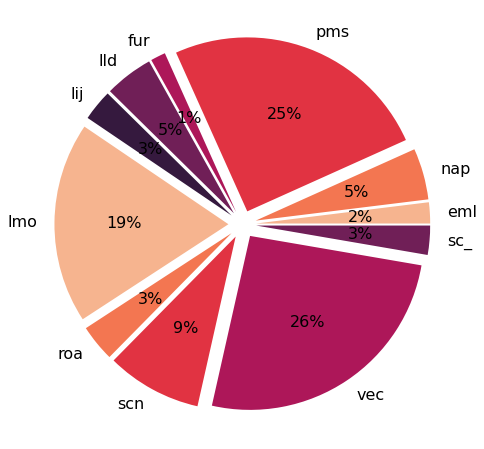

In [8]:
counts = df.groupby('label').count()['id']

import matplotlib.pyplot as plt
import seaborn as sns

labels = [x[:3] for x in fold_label.keys()]
colors = sns.color_palette('rocket_r')[0:11]

plt.figure(figsize=(8,8))

plt.pie(counts, explode=[0.08]*11, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 16})
#plt.savefig('figure1.pdf', bbox_inches='tight')
plt.show()

In [9]:
from nltk.tokenize import sent_tokenize
counts = [[0]*11, [0]*11]
for l in range(11):
    texts = df[df['label']==l]['clean']
    for t in texts:
        numsen = len(sent_tokenize(t))
        if numsen > 2:
            counts[0][l] += 1
        else:
            counts[1][l] += 1


In [10]:
import numpy as np
counts = np.array(counts)

In [11]:
counts

array([[  684,  2145, 26921,  1781,  1191,  2662, 35760,   720,  8444,
         8658,  4702],
       [ 4490, 10506, 39304,  1900, 10781,  5014, 13742,  8338, 15039,
        59760,  2474]])

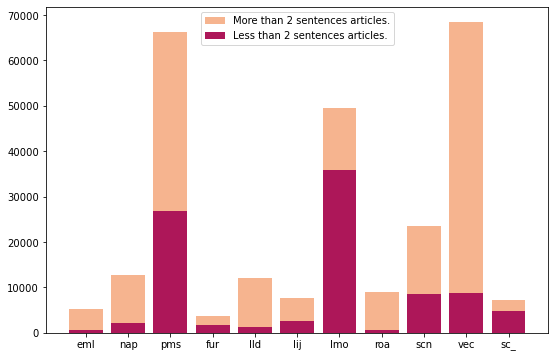

In [12]:
plt.figure(figsize=(9,6))

plt.bar(labels, height=counts[1]+counts[0], label="More than 2 sentences articles.", color=colors[:1])
plt.bar(labels, height=counts[0], label="Less than 2 sentences articles.", color=colors[3:4])

plt.legend(loc='upper center')
#plt.savefig('figure2.pdf', bbox_inches='tight')
plt.show()